[(44, 0), (53, 0), (62, 6), (99, 48), (98, 63), (89, 98), (15, 97), (3, 43), (26, 2)]
[(44, 0), (53, 0), (62, 6), (99, 48), (98, 63), (89, 98), (15, 97), (3, 43), (26, 2)]


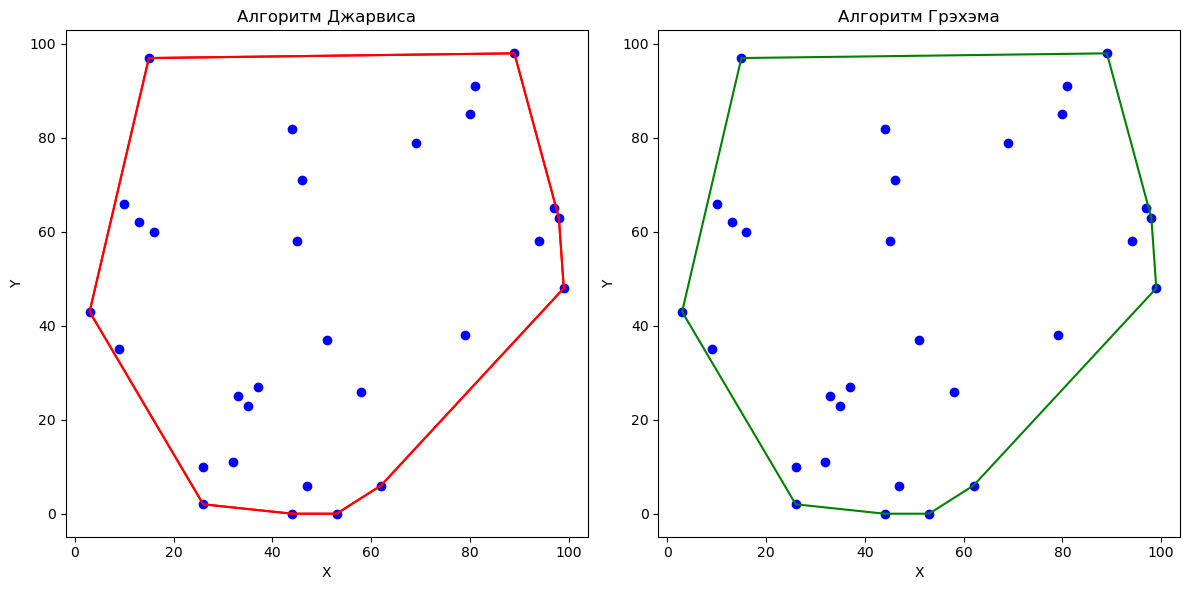

In [134]:
import math
import matplotlib.pyplot as plt
import random
from functools import cmp_to_key
import numpy as np


class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __sub__(self, other):
        return Point(self.x - other.x, self.y - other.y)

    def __eq__(self, other):
        return self.x == other.x and self.y == other.y

    def cross(self, other):
        return self.x * other.y - self.y * other.x

    def distance(self, other):
        return math.sqrt((self.x - other.x) ** 2 + (self.y - other.y) ** 2)

    def __repr__(self):
        return f"({self.x}, {self.y})"

    def __hash__(self):
        return hash((self.x, self.y))


def jarvis(points):
    if len(points) <= 1:
        return points

    p0 = min(points, key=lambda p: (p.y, p.x))
    hull = [p0]
    points_set = set(points)
    while True:
        t = None
        for p in points_set:
            t = p
            break
        last_added = hull[-1]
        for p in points_set:

            cross = (p - last_added).cross(t - last_added)
            if cross > 0 or (cross == 0 and
                             (p - last_added).x ** 2 + (p - last_added).y ** 2 > (t - last_added).x ** 2 + (
                                     t - last_added).y ** 2):
                t = p

        if t == hull[0]:
            break
        hull.append(t)
        points_set.remove(t)

    return hull


def graham(points):
    if len(points) <= 3:
        return points

    p0 = min(points, key=lambda p: (p.y, p.x))

    # Функция для сравнения углов
    def compare(a, b):
        v1 = a - p0
        v2 = b - p0
        cross = v1.cross(v2)

        if cross == 0:
            # Если точки на одной прямой, выбираем ближнюю
            return (v1.x ** 2 + v1.y ** 2) - (v2.x ** 2 + v2.y ** 2)
        return -1 if cross > 0 else 1

    sorted_points = sorted([p for p in points if p != p0], key=cmp_to_key(compare))
    hull = [p0]
    for p in sorted_points:
        while len(hull) >= 2:
            new_vec = p - hull[-1]
            last_vec = hull[-1] - hull[-2]
            cross = new_vec.cross(last_vec)
            if cross > 0 or (cross == 0 and (new_vec.x ** 2 + new_vec.y ** 2) < (last_vec.x ** 2 + last_vec.y ** 2)):
                hull.pop()
            else:
                break
        hull.append(p)

    return hull


# Функция для сравнения, так как в Python 3 нет cmp в sorted

# Генерация случайных точек
# random.seed(42)
points = [Point(random.randint(0, 100), random.randint(0, 100)) for _ in range(30)]

# Удаление дубликатов
unique_points = []
seen = set()
for p in points:
    if (p.x, p.y) not in seen:
        seen.add((p.x, p.y))
        unique_points.append(p)
points = unique_points

# Вычисление выпуклых оболочек
jarvis_hull = jarvis(points)
graham_hull = graham(points)

# Визуализация
plt.figure(figsize=(12, 6))

# Алгоритм Джарвиса
plt.subplot(1, 2, 1)
x = [p.x for p in points]
y = [p.y for p in points]
plt.scatter(x, y, color='blue', label='Точки')

hull_x = [p.x for p in jarvis_hull] + [jarvis_hull[0].x]
hull_y = [p.y for p in jarvis_hull] + [jarvis_hull[0].y]
plt.plot(hull_x, hull_y, 'r-', label='Выпуклая оболочка')
hull_x = [p.x for p in jarvis_hull] + [jarvis_hull[0].x]
hull_y = [p.y for p in jarvis_hull] + [jarvis_hull[0].y]
plt.plot(hull_x, hull_y, 'r-', )

plt.title('Алгоритм Джарвиса')
plt.xlabel('X')
plt.ylabel('Y')

# Алгоритм Грэхэма
plt.subplot(1, 2, 2)
x = [p.x for p in points]
y = [p.y for p in points]
plt.scatter(x, y, color='blue', label='Точки')

hull_x = [p.x for p in graham_hull] + [graham_hull[0].x]
hull_y = [p.y for p in graham_hull] + [graham_hull[0].y]
plt.plot(hull_x, hull_y, 'g-', )
print(graham_hull)
plt.title('Алгоритм Грэхэма')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
print(jarvis_hull)
plt.show()

In [131]:
def calculate_perimeter(hull):
    perimeter = 0.0
    n = len(hull)
    for i in range(n):
        perimeter += hull[i].distance(hull[(i + 1) % n])
    return perimeter


def calculate_area(hull):
    area = 0.0
    n = len(hull)
    for i in range(n):
        x_i, y_i = hull[i].x, hull[i].y
        x_j, y_j = hull[(i + 1) % n].x, hull[(i + 1) % n].y
        area += (x_i * y_j) - (x_j * y_i)
    return abs(area) / 2


jarvis_perimeter = calculate_perimeter(jarvis_hull)
jarvis_area = calculate_area(jarvis_hull)

graham_perimeter = calculate_perimeter(graham_hull)
graham_area = calculate_area(graham_hull)
# Вывод результатов в консоль
print("Результаты алгоритма Джарвиса:")
print(f"Периметр выпуклой оболочки: {jarvis_perimeter:.2f}")
print(f"Площадь выпуклой оболочки: {jarvis_area:.2f}\n")

print("Результаты алгоритма Грэхэма:")
print(f"Периметр выпуклой оболочки: {graham_perimeter:.2f}")
print(f"Площадь выпуклой оболочки: {graham_area:.2f}")

Результаты алгоритма Джарвиса:
Периметр выпуклой оболочки: 328.17
Площадь выпуклой оболочки: 7339.00

Результаты алгоритма Грэхэма:
Периметр выпуклой оболочки: 328.17
Площадь выпуклой оболочки: 7339.00


In [132]:
def is_point_inside_ray_method(polygon, point):
    x, y = point
    n = len(polygon)
    inside = False
    for i in range(n):
        x1, y1 = polygon[i]
        x2, y2 = polygon[(i + 1) % n]
        if abs(y1 - y2) < 1e-9:
            if abs(y - y1) < 1e-9 and (x1 <= x <= x2 or x2 <= x <= x1):
                return False
        elif abs(x1 - x2) < 1e-9:
            if abs(x - x1) < 1e-9 and (y1 <= y <= y2 or y2 <= y <= y1):
                return False
        else:
            t = (x - x1) / (x2 - x1)
            if 0 <= t <= 1 and abs(y - (y1 + t * (y2 - y1))) < 1e-9:
                return False

        if x == x1 and y == y1: return False
        if x == x2 and y == y2: return False
        # если по y вершины по разные стороны от луча
        if (((y1 > y) != (y2 > y))
                and (x < (x2 - x1) * (y - y1) / (y2 - y1) + x1)):
            inside = not inside
    return inside


def x_intersect(x1, y1, x2, y2, x3, y3, x4, y4):
    return (((x1 * y2 - y1 * x2) * (x3 - x4) - (x1 - x2) * (x3 * y4 - y3 * x4)) /
            ((x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)))


def y_intersect(x1, y1, x2, y2, x3, y3, x4, y4):
    return (((x1 * y2 - y1 * x2) * (y3 - y4) - (y1 - y2) * (x3 * y4 - y3 * x4)) /
            ((x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)))


def clip(polygon, x1, y1, x2, y2):
    new_points = list()
    poly_size = len(polygon)

    for i in range(poly_size):
        sx, sy = polygon[i]
        ex, ey = polygon[(i + 1) % poly_size]

        start_cross = (x2 - x1) * (sy - y1) - (y2 - y1) * (sx - x1)
        end_cross = (x2 - x1) * (ey - y1) - (y2 - y1) * (ex - x1)

        if start_cross > 0 and end_cross > 0:
            new_points.append([ex, ey])
        elif start_cross <= 0 < end_cross:
            new_points.append([x_intersect(x1, y1, x2, y2, sx, sy, ex, ey),
                               y_intersect(x1, y1, x2, y2, sx, sy, ex, ey)])
            new_points.append([ex, ey])
        elif start_cross > 0 >= end_cross:
            new_points.append([x_intersect(x1, y1, x2, y2, sx, sy, ex, ey),
                               y_intersect(x1, y1, x2, y2, sx, sy, ex, ey)])
        # else: both outside => do nothing

    return np.array(new_points)


def clip_by_polygon(polygon, clipper):
    clipper_size = len(clipper)
    for i in range(clipper_size):
        k = (i + 1) % clipper_size
        polygon = clip(polygon, clipper[i][0], clipper[i][1], clipper[k][0], clipper[k][1])
    return polygon


def plot_point(x, y, color):
    plt.scatter(x, y, color=color, zorder=4)


def plot_hull(hull, color):
    hull_x = [p[0] for p in hull] + [hull[0][0]]
    hull_y = [p[1] for p in hull] + [hull[0][1]]
    plt.plot(hull_x, hull_y, color = color)

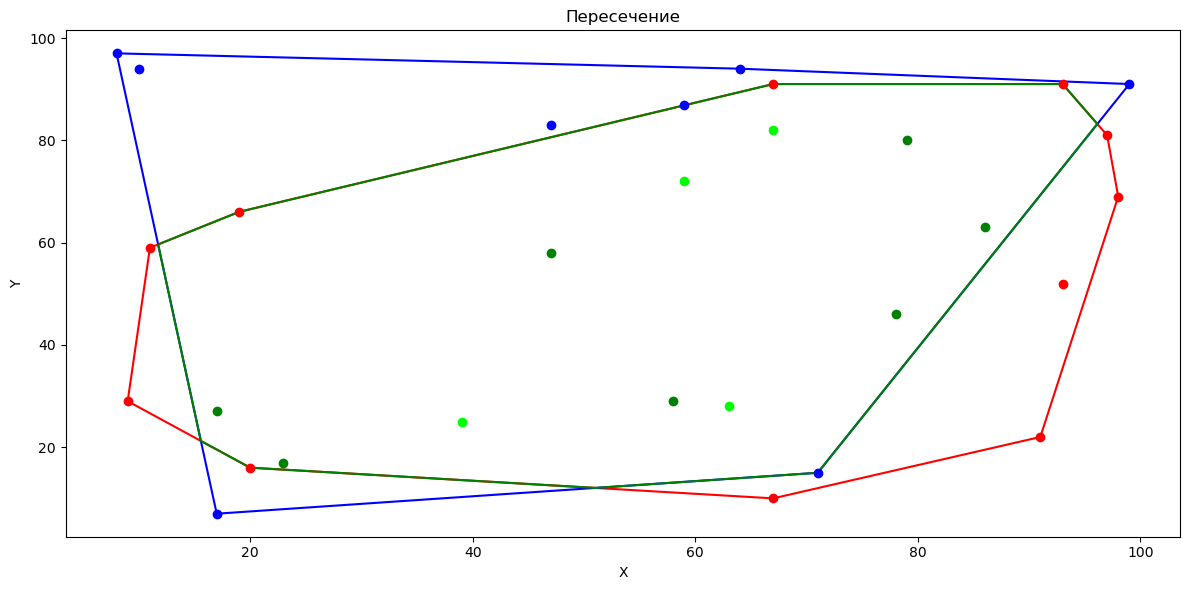

In [133]:
first = [Point(random.randint(0, 100), random.randint(0, 100)) for _ in range(15)]
second = [Point(random.randint(0, 100), random.randint(0, 100)) for _ in range(15)]
unique_points = []
seen = set()
for p in first:
    if (p.x, p.y) not in seen:
        seen.add((p.x, p.y))
        unique_points.append(p)
first = unique_points
unique_points = []
seen = set()
for p in second:
    if (p.x, p.y) not in seen:
        seen.add((p.x, p.y))
        unique_points.append(p)
second = unique_points

first_hull = [[p.x, p.y] for p in jarvis(first)]
second_hull = [[p.x, p.y] for p in jarvis(second)]
intersection = clip_by_polygon(first_hull, second_hull)

plt.figure(figsize=(12, 6))

plot_hull(first_hull, color='red')
plot_hull(second_hull, color='blue')
plot_hull(intersection, color='green')
for p in first:
    p_arr = [p.x, p.y]
    if is_point_inside_ray_method(intersection, p_arr):
        plot_point(p.x,p.y,'lime')
    else:
        plot_point(p.x,p.y,'red')
for p in second:
    p_arr = [p.x, p.y]
    if is_point_inside_ray_method(intersection, p_arr):
        plot_point(p.x,p.y,'green')
    else:
        plot_point(p.x,p.y,'blue')

plt.title('Пересечение')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()